In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def get_content(pattern, path="."):
    files = os.listdir(path)
    matches = [x for x in files if pattern in x]
    print(f"Found {len(matches)} matches: {matches}")
    name = matches[0]
    if name.endswith("npy"):
        return np.load(path+"/"+name)
    elif name.endswith("pickle"):
        with open(path+"/"+name, "rb") as f:
            return pickle.load(f)

def plot_lists(lists, legend=[], 
                legend_title="",
                figsize=(14,6), 
                subplots=(1,1),
                ax=None, x=None
                ):
    if not ax:
        _, ax = plt.subplots(*subplots, figsize=figsize)
    if x:
        [ax.plot(x, l) for l in lists]
    else:
        [ax.plot(l) for l in lists]
    ax.legend(legend, title=legend_title)
    return ax


In [10]:
val_losses_128 = get_content("val_losses", path="../DEFAULT")
train_losses_128 = get_content("train_losses", path="../DEFAULT")
val_metrics_128 = get_content("val_metrics", path="../DEFAULT")
train_metrics_128 = get_content("train_metrics", path="../DEFAULT")
duration_128 = get_content("duration", path="../DEFAULT")

prefix_64 = "conv128-fcnn64"
val_losses_64 = get_content(f"{prefix_64}-val_losses")
train_losses_64 = get_content(f"{prefix_64}-train_losses")
val_metrics_64 = get_content(f"{prefix_64}-val_metrics")
train_metrics_64 = get_content(f"{prefix_64}-train_metrics")
duration_64 = get_content(f"{prefix_64}-duration")

prefix_256_128 = "conv128-fcnn256_128"
val_losses_256_128 = get_content(f"{prefix_256_128}-val_losses")
train_losses_256_128 = get_content(f"{prefix_256_128}-train_losses")
val_metrics_256_128 = get_content(f"{prefix_256_128}-val_metrics")
train_metrics_256_128 = get_content(f"{prefix_256_128}-train_metrics")
duration_256_128 = get_content(f"{prefix_256_128}-duration")

prefix_512_256_128 = "conv128-fcnn512_256_128"
val_losses_512_256_128 = get_content(f"{prefix_512_256_128}-val_losses")
train_losses_512_256_128 = get_content(f"{prefix_512_256_128}-train_losses")
val_metrics_512_256_128 = get_content(f"{prefix_512_256_128}-val_metrics")
train_metrics_512_256_128 = get_content(f"{prefix_512_256_128}-train_metrics")
duration_512_256_128 = get_content(f"{prefix_512_256_128}-duration")

Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl150_model-conv128-bn_cFalse_f_False-fcnn128-val_losses.pickle']
Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl150_model-conv128-bn_cFalse_f_False-fcnn128-train_losses.pickle']
Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl150_model-conv128-bn_cFalse_f_False-fcnn128-val_metrics.pickle.npy']
Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl150_model-conv128-bn_cFalse_f_False-fcnn128-train_metrics.pickle.npy']
Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl150_model-conv128-bn_cFalse_f_False-fcnn128-duration.pickle']
Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl150_model-conv128-fcnn64-val_losses.pickle']
Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl150_model-conv128-fcnn64-train_losses.pickle']
Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


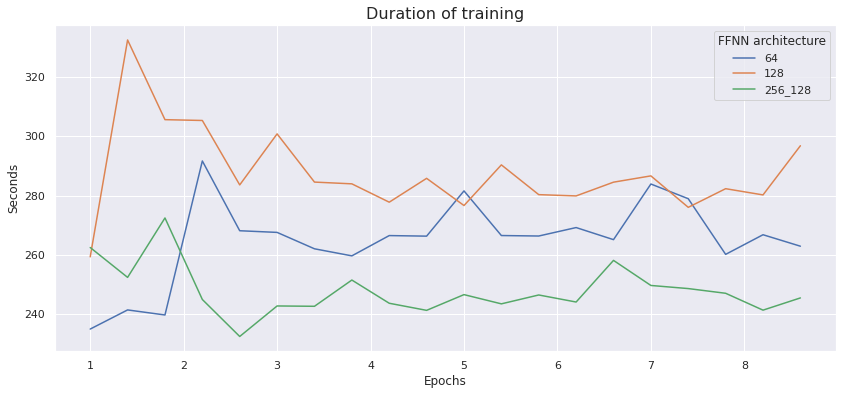

In [11]:
ax = plot_lists([duration_64, 
                duration_128, 
                duration_256_128,
                duration_512_256_128], 
                legend_title="FFNN architecture",
                legend=["64", "128", "256_128", "512_256_128"])
ax.set_title("Duration of training", fontsize=16)
ax.set_xlabel("Epochs")
ax.set_xticklabels(range(20))
_ = ax.set_ylabel("Seconds")

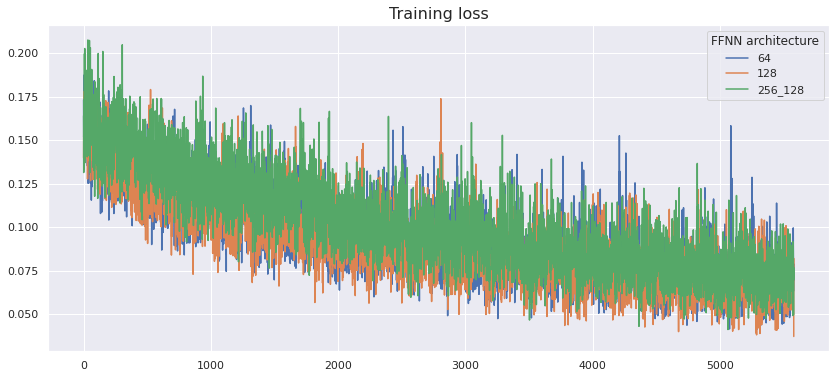

In [12]:
ax = plot_lists([train_losses_64[500:], 
                train_losses_128[500:], 
                train_losses_256_128[500:],
                train_losses_512_256_128[500:]], 
                legend_title="FFNN architecture",
                legend=["64", "128", "256_128", "512_256_128"])
_ = ax.set_title("Training loss", fontsize=16)

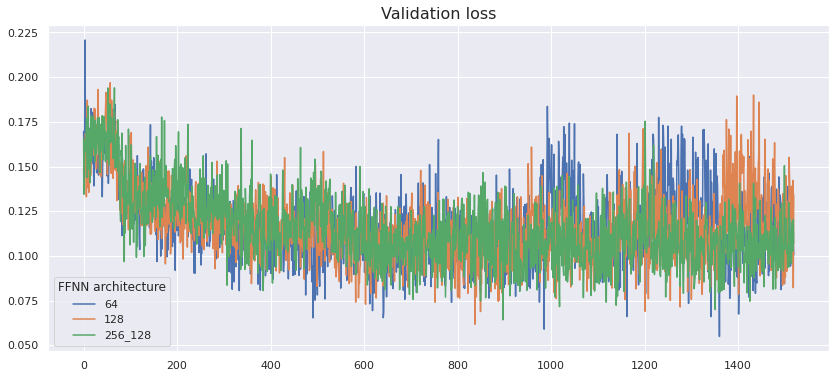

In [13]:
ax = plot_lists([val_losses_64, 
                val_losses_128, 
                val_losses_256_128,
                val_losses_512_256_128],                 
                legend_title="FFNN architecture",
                legend=["64", "128", "256_128", "512_256_128"])
_ = ax.set_title("Validation loss", fontsize=16)

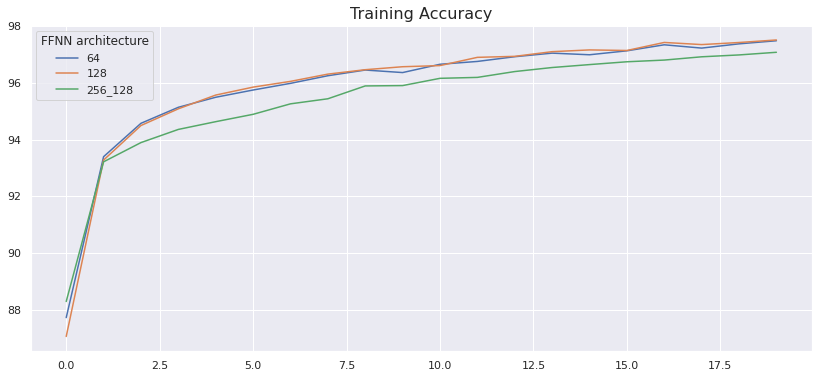

In [14]:
ax = plot_lists([train_metrics_64[:,0], 
                train_metrics_128[:,0], 
                train_metrics_256_128[:,0],
                train_metrics_512_256_128[:,0]], 
                legend_title="FFNN architecture",
                legend=["64", "128", "256_128", "512_256_128"])

_ = ax.set_title("Training Accuracy", fontsize=16)

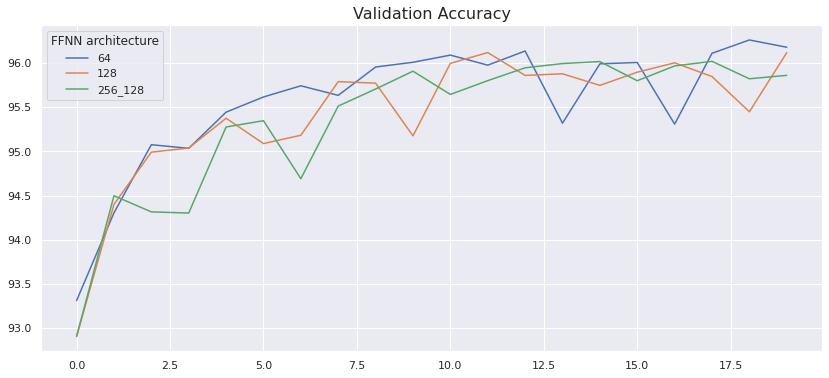

In [15]:
ax = plot_lists([val_metrics_64[:,0], 
                val_metrics_128[:,0], 
                val_metrics_256_128[:,0],
                val_metrics_512_256_128[:,0]],                 
                legend_title="FFNN architecture",
                legend=["64", "128", "256_128", "512_256_128"])

_ = ax.set_title("Validation Accuracy", fontsize=16)

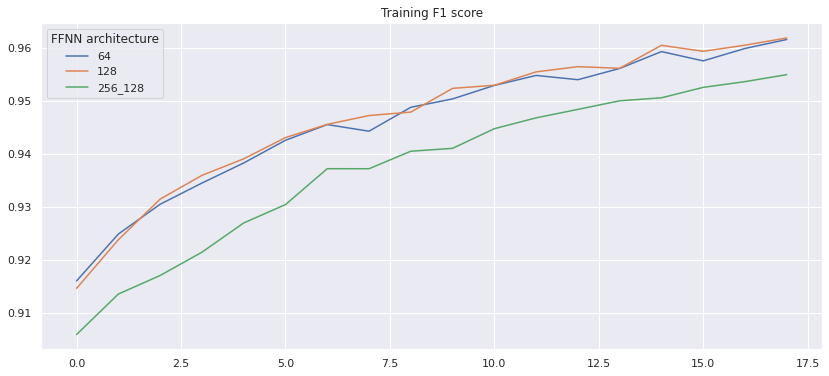

In [16]:
ax = plot_lists([train_metrics_64[:,1][2:], train_metrics_128[:,1][2:], train_metrics_256_128[:,1][2:], train_metrics_512_256_128[:,1][2:]], 
                legend_title="FFNN architecture",
                legend=["64", "128", "256_128", "512_256_128"])

_ = ax.set_title("Training F1 score")

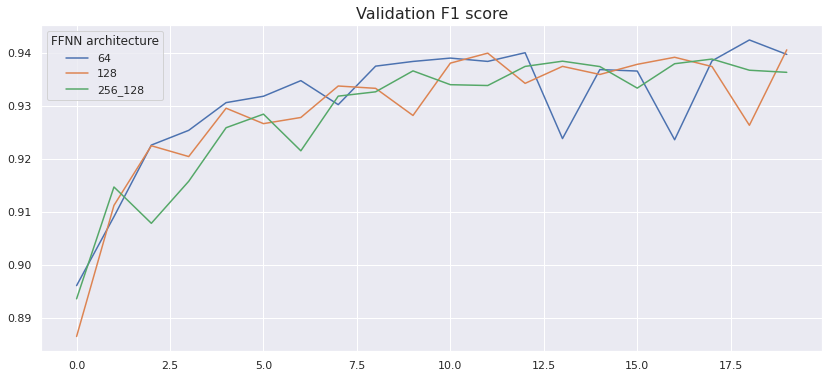

In [17]:
ax = plot_lists([val_metrics_64[:,1], val_metrics_128[:,1], val_metrics_256_128[:,1], val_metrics_512_256_128[:,1]],                 
                legend_title="FFNN architecture",
                legend=["64", "128", "256_128", "512_256_128"])

_ = ax.set_title("Validation F1 score", fontsize=16)

In [19]:
df = pd.DataFrame([val_metrics_64[:,1], val_metrics_128[:,1], val_metrics_256_128[:,1], val_metrics_512_256_128[:,1]],                 
                index=["64", "128", "256_128", "512_256_128"])
df[[15,16,17,18,19]].mean(axis=1)

64         0.936141
128        0.936245
256_128    0.936616
dtype: float64